# VLMs guessing algorithms to process images
In this notebook we will use a VLM to guess an algorithm that could be used to process an image.

We do this 25 times and draw a wordcloud from the responses.

In [1]:
from bia_bob import bob, ask_llm
from skimage.data import human_mitosis
import wordcloud
import matplotlib.pyplot as plt

In [2]:
bob.initialize(model="gpt-4o-2024-08-06", vision_model="gpt-4o-2024-08-06")

In [3]:
image = human_mitosis()

In [4]:
def ask():
    return ask_llm("""
    You are an excellent bio-image analyst and Python developer. 
    Given an image, describe what you see in one sentence. 
    Afterwards, propose a Deep-Learning based Python library afterwards. 
    Only write the name of the library.
    """, image)

ask()

'The image shows a microscopic view of numerous cell nuclei stained to highlight their structure. \n\nLibrary: Cellpose'

In [5]:
responses = []
for _ in range(25):
    responses.append(ask())

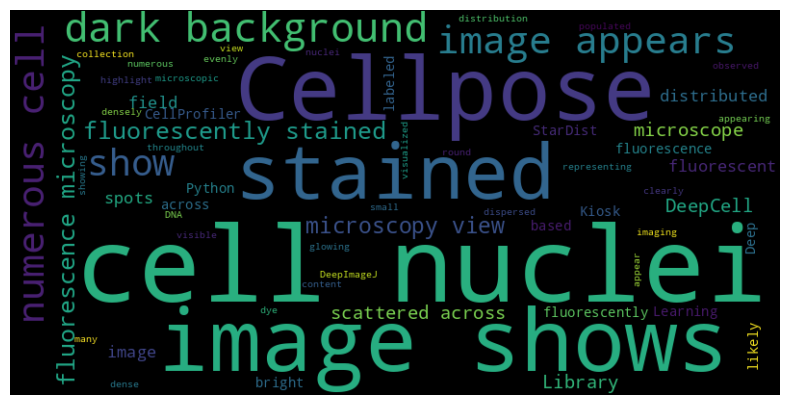

In [6]:
text = "\n".join(responses)

# Generate word cloud
w = wordcloud.WordCloud(width=800, height=400, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(w, interpolation='bilinear')
plt.axis('off')
plt.show()

In [7]:
[r.replace("\n", " ").split(" ")[-1] for r in responses]

['CellProfiler.',
 'Cellpose.',
 'Cellpose',
 'StarDist',
 'Cellpose',
 'Cellpose',
 'DeepCell.',
 'Cellpose',
 'Kiosk.',
 'Cellpose',
 'Cellpose',
 'Cellpose',
 'CellPose',
 'Cellpose',
 'Kiosk.',
 'Cellpose',
 'DeepImageJ',
 'DeepCell.',
 'StarDist.',
 'CellPose',
 'CellPose.',
 'Cellpose',
 'Cellpose',
 'Cellpose',
 'CellProfiler.']

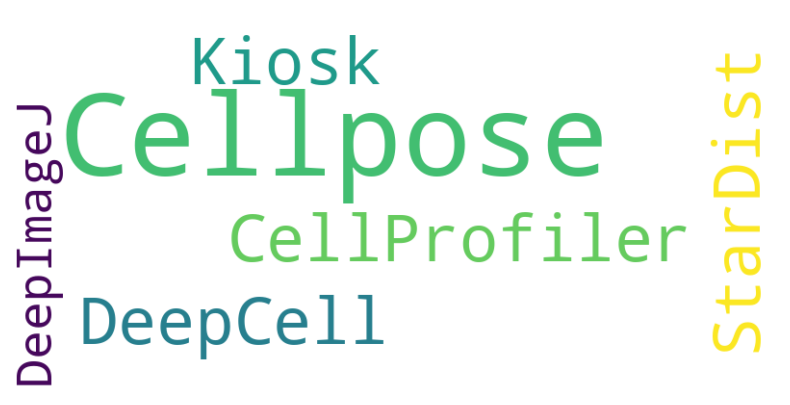

In [9]:
text = "\n".join([r.replace("\n", " ").split(" ")[-1] for r in responses])

# Generate word cloud
w2 = wordcloud.WordCloud(width=800, height=400, colormap='viridis', background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(w2, interpolation='bilinear')
plt.axis('off')
plt.show()